# 4.0 Feature Validation Trial 3

### Data Set Up

In [2]:
# Basic Operations
import pandas as pd
import numpy as np

# Data Visualization
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [36]:
# Raw Data
raw_data = pd.read_csv("data/training-set-1/pose_data_raw.csv")

raw_data['label'] = raw_data['pose_name'].str.replace('-lft', '').str.replace('-rgt', '')
labels, uniques = pd.factorize(raw_data['label'])
raw_data['label_encoded'] = labels 

X= raw_data.iloc[:,2:134]
y = raw_data['label_encoded'].values

# Augmented Data without Angles and Distances
# Total 99 Features
aug_data1 = pd.read_csv("data/training-set-1/pose_data_augmented.csv")
Xa1 = aug_data1.iloc[:,5:134]
ya1 = aug_data1['label_encoded'].values

# Augmented Data with Added/Removed Features
# Total 123 Features
aug_data2 = pd.read_csv("data/training-set-1/pose_data_augmented_res.csv")
aug_data2 = aug_data2.loc[:, ~aug_data2.columns.str.contains('_v')] #Removed Visibility Variable
Xa2 = aug_data2.iloc[:,5:134]
ya2 = aug_data2['label_encoded'].values

# Augmented Data with Improved Angle/Distance Calculation
# Total: 63 features
aug_data3 = pd.read_csv("data/training-set-1/pose_data_augmented_res_z.csv")
aug_data3 = aug_data3.loc[:, ~aug_data3.columns.str.contains('_v')]
Xa3 = pd.concat([aug_data3.iloc[:, 5:8], aug_data3.iloc[:, 38:56], aug_data3.iloc[:, 74:92], aug_data3.iloc[:, 104:]],axis=1)
ya3 = aug_data3['label_encoded'].values

# Augmented Data with Only Features Created
# Total: 24 features
Xa4 = aug_data3.iloc[:, 104:]
ya4 = aug_data3['label_encoded'].values
Xa4

# Augmented Data with Only Features Created
# Total: 24 features
Xa5 = pd.concat([aug_data3.iloc[:, 5:8], aug_data3.iloc[:, 38:56], aug_data3.iloc[:, 74:92]],axis=1)

Xa5

,landmark_00_x,landmark_00_y,landmark_00_z,landmark_11_x,landmark_11_y,landmark_11_z,landmark_12_x,landmark_12_y,landmark_12_z,landmark_13_x,...,landmark_25_z,landmark_26_x,landmark_26_y,landmark_26_z,landmark_27_x,landmark_27_y,landmark_27_z,landmark_28_x,landmark_28_y,landmark_28_z
0,0.545408,0.740922,-0.407526,0.668044,0.660940,0.036965,0.646923,0.670012,-0.698056,0.757197,...,0.369050,0.548827,0.184575,-0.362084,0.306859,0.294511,0.466520,0.294691,0.291979,-0.297353
1,0.607888,0.740922,-0.306625,0.651476,0.660940,0.152408,0.758311,0.670012,-0.575114,0.739991,...,0.461574,0.603365,0.184575,-0.261280,0.221186,0.294511,0.512718,0.341848,0.291979,-0.241663
2,0.651898,0.740922,-0.196408,0.615113,0.660940,0.263220,0.846658,0.670012,-0.434697,0.700301,...,0.540074,0.639569,0.184575,-0.152538,0.128793,0.294511,0.543338,0.378619,0.291979,-0.178630
3,0.676100,0.740922,-0.080224,0.560061,0.660940,0.366034,0.909279,0.670012,-0.281073,0.639332,...,0.602163,0.656341,0.184575,-0.039160,0.032487,0.294511,0.557448,0.403886,0.291979,-0.110170
4,0.679759,0.740922,0.038399,0.487991,0.660940,0.457727,0.944273,0.670012,-0.118908,0.558938,...,0.645956,0.653169,0.184575,0.075407,-0.064806,0.294511,0.554620,0.416881,0.291979,-0.038362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19579,0.221597,0.731075,-0.655868,0.402962,0.681036,-0.374963,-0.005541,0.721055,-0.671776,0.420130,...,-0.300005,-0.083652,0.487081,-0.258854,0.563596,0.223578,-0.207715,0.158075,0.692486,-0.113018
19580,0.332121,0.731075,-0.607424,0.461952,0.681036,-0.299293,0.111196,0.721055,-0.662532,0.460604,...,-0.215341,-0.037431,0.487081,-0.269447,0.591103,0.223578,-0.106691,0.175299,0.692486,-0.083852
19581,0.432553,0.731075,-0.540524,0.506906,0.681036,-0.214529,0.224554,0.721055,-0.633158,0.487082,...,-0.124135,0.009926,0.487081,-0.271854,0.600650,0.223578,-0.002427,0.187197,0.692486,-0.052138
19582,0.519843,0.731075,-0.457200,0.536457,0.681036,-0.123247,0.331089,0.721055,-0.584545,0.498761,...,-0.029156,0.056982,0.487081,-0.266000,0.591946,0.223578,0.101912,0.193406,0.692486,-0.018839


## 4.1 Cross Validation of Data Augmentation

<Axes: >

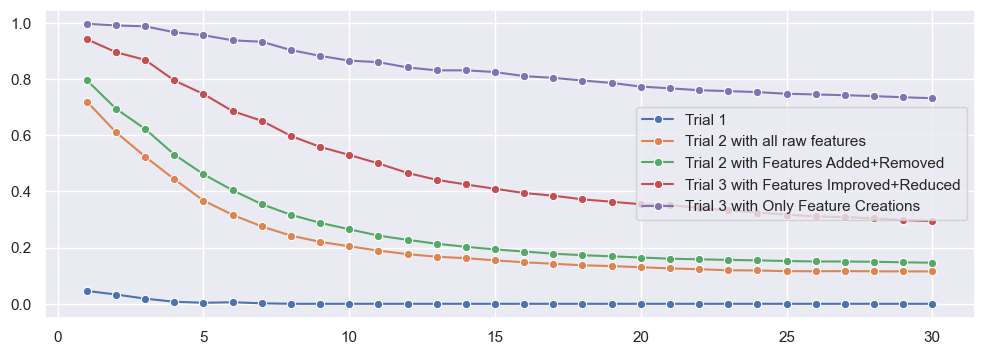

In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
Xa1_scaled = scaler.fit_transform(Xa1)
Xa2_scaled = scaler.fit_transform(Xa2)
Xa3_scaled = scaler.fit_transform(Xa3)
Xa4_scaled = scaler.fit_transform(Xa4)

k_values = [i for i in range(1, 31)]

X_score_means = []
Xa1_score_means = []
Xa2_score_means = []
Xa3_score_means = []
Xa4_score_means = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    X_score = cross_val_score(knn, X_scaled, y, cv=LeaveOneOut(), scoring='accuracy')
    X_score_means.append(np.mean(X_score))
    Xa1_score = cross_val_score(knn, Xa1_scaled, ya1, cv=10, scoring='accuracy')
    Xa1_score_means.append(np.mean(Xa1_score))
    Xa2_score = cross_val_score(knn, Xa2_scaled, ya2, cv=10, scoring='accuracy')
    Xa2_score_means.append(np.mean(Xa2_score))
    Xa3_score = cross_val_score(knn, Xa3_scaled, ya3, cv=10, scoring='accuracy')
    Xa3_score_means.append(np.mean(Xa3_score))
    Xa4_score = cross_val_score(knn, Xa4_scaled, ya4, cv=10, scoring='accuracy')
    Xa4_score_means.append(np.mean(Xa4_score))

sns.set(rc={'figure.figsize':(12,4)})
sns.lineplot(x = k_values, y = X_score_means, marker = 'o', label='Trial 1')
sns.lineplot(x = k_values, y = Xa1_score_means, marker = 'o', label='Trial 2 with all raw features')
sns.lineplot(x = k_values, y = Xa2_score_means, marker = 'o', label='Trial 2 with Features Added+Removed')
sns.lineplot(x = k_values, y = Xa3_score_means, marker = 'o', label='Trial 3 with Features Improved+Reduced')
sns.lineplot(x = k_values, y = Xa4_score_means, marker = 'o', label='Trial 3 with Only Feature Creations')

## 4.2 Dimensionality Reduction Methods and KNN

### 4.2.1 Principal Component Analysis

544


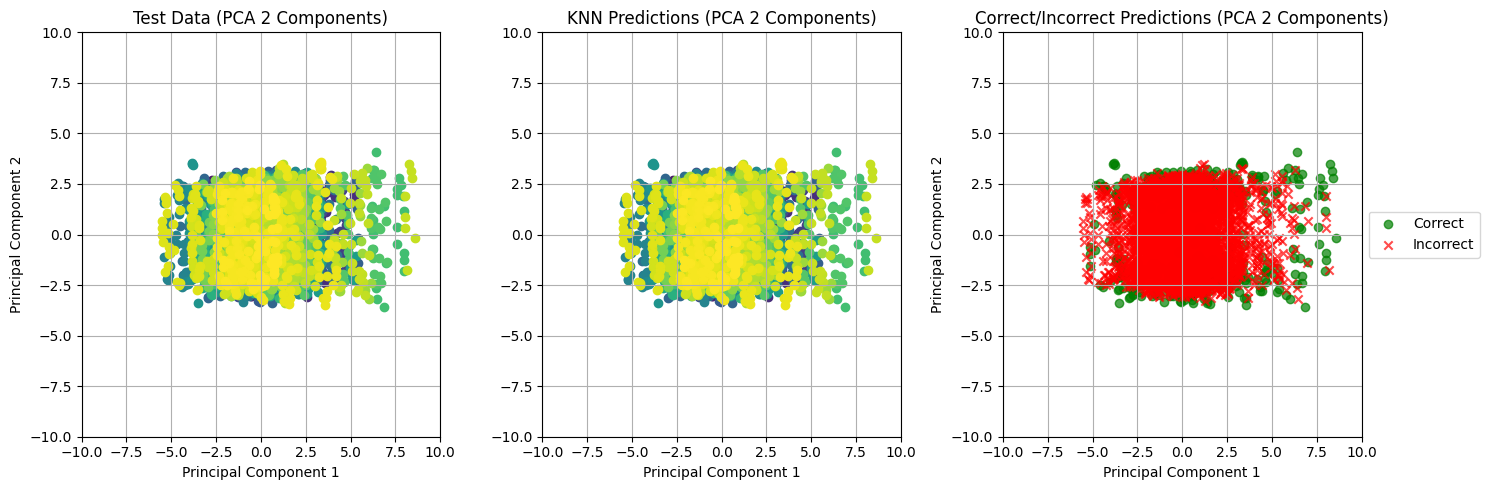

544


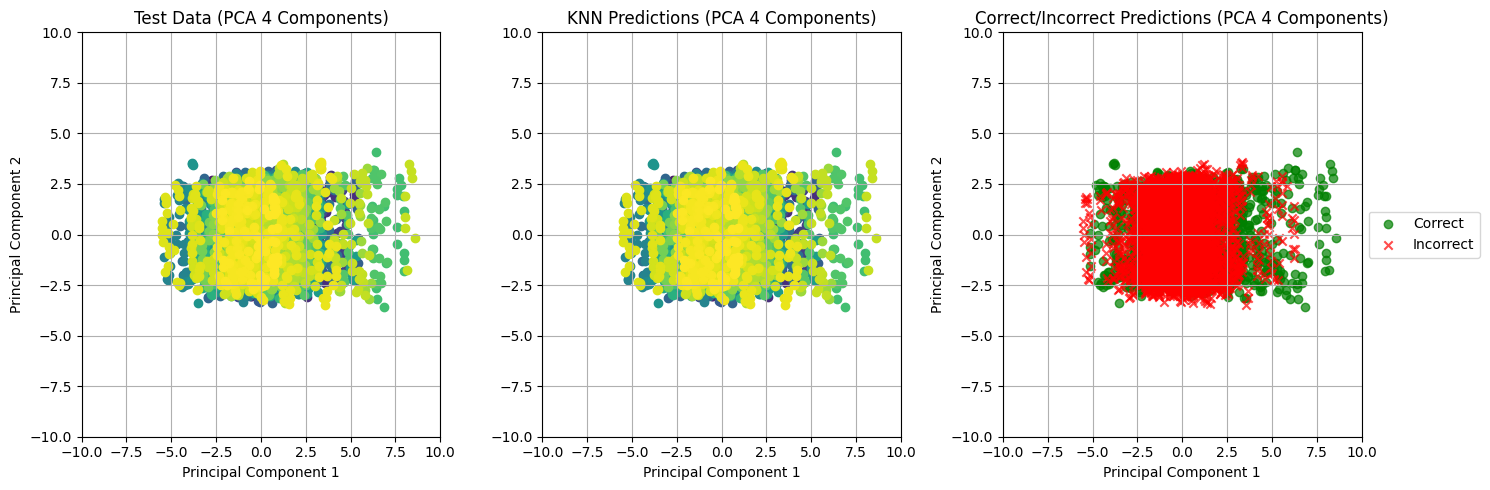

544


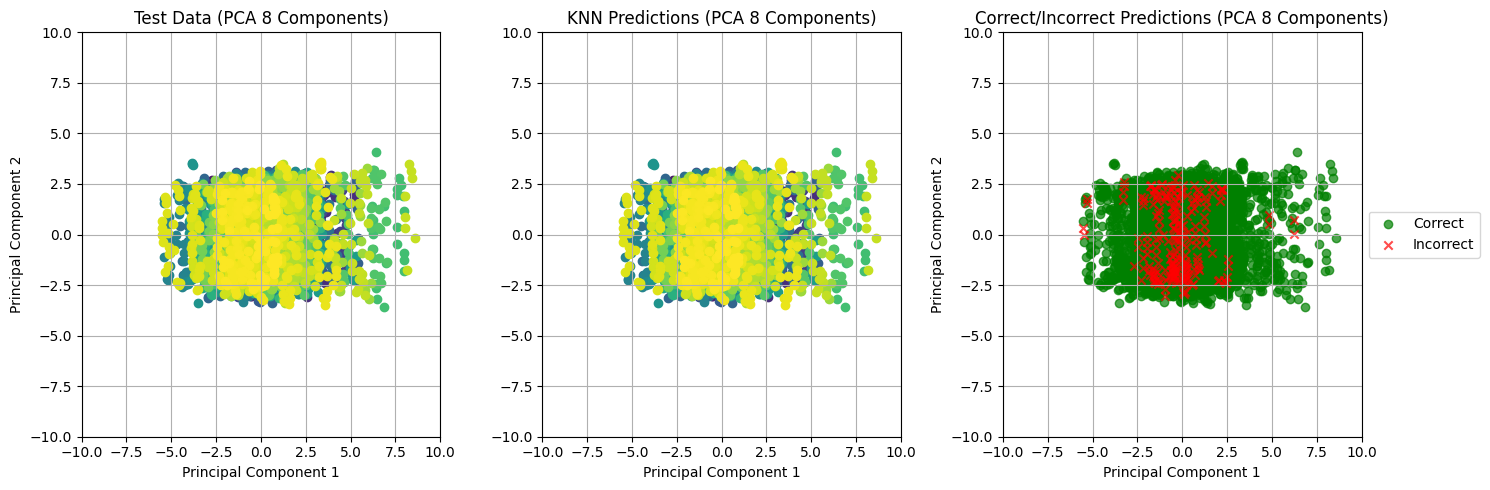

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import cm

def randomize_pose_classes(df, size):
    unique_classes = np.unique(df['label'])
    selected_classes = np.random.choice(unique_classes, size=size, replace=False)
    filtered_df = df[df['label'].isin(selected_classes)]
    return filtered_df

def plot_pca_components(fdata, n_components):
    X = fdata.iloc[:, 104:] 
    y = fdata['label_encoded'].values
    pose_names = fdata['image_filename'].values

    unique_poses = np.unique(pose_names)
    color_values = cm.viridis(np.linspace(0, 1, num=len(unique_poses)))

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test, pose_names_train, pose_names_test = train_test_split(X_scaled, y, pose_names, stratify=y, test_size=0.3, random_state=42)

    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    model = KNeighborsClassifier(n_neighbors=15, weights='distance')
    model.fit(X_train_pca, y_train)

    y_pred = model.predict(X_test_pca)

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    for i, pose in enumerate(unique_poses):
        idx = pose_names_test == pose
        axes[0].scatter(X_test_pca[idx, 0], X_test_pca[idx, 1], color=color_values[i], label=pose)
    axes[0].set_title(f'Test Data (PCA {n_components} Components)')
    axes[0].set_xlabel('Principal Component 1')
    axes[0].set_ylabel('Principal Component 2')
    axes[0].grid(True)
    axes[0].set_xlim([-10, 10])
    axes[0].set_ylim([-10, 10])

    # Predictions Plot
    for i, pose in enumerate(unique_poses):
        idx = pose_names_test == pose
        axes[1].scatter(X_test_pca[idx, 0], X_test_pca[idx, 1], color=color_values[i], label=pose)
    axes[1].set_title(f'KNN Predictions (PCA {n_components} Components)')
    axes[1].set_xlabel('Principal Component 1')
    axes[1].grid(True)
    axes[1].set_xlim([-10, 10])
    axes[1].set_ylim([-10, 10])

    # True Labels Plot
    correct = y_pred == y_test
    incorrect = ~correct
    axes[2].scatter(X_test_pca[correct, 0], X_test_pca[correct, 1], c='green', marker='o', alpha=0.7, label='Correct')
    axes[2].scatter(X_test_pca[incorrect, 0], X_test_pca[incorrect, 1], c='red', marker='x', alpha=0.7, label='Incorrect')
    axes[2].set_title(f'Correct/Incorrect Predictions (PCA {n_components} Components)')
    axes[2].set_xlabel('Principal Component 1')
    axes[2].set_ylabel('Principal Component 2')
    axes[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[2].grid(True)
    axes[2].set_xlim([-10, 10])
    axes[2].set_ylim([-10, 10])
    
    print(len(unique_poses))
    
    if len(unique_poses) < 11:
        axes[0].legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), fontsize='small', ncol=2)
        
    plt.tight_layout()
    plt.show()

aug_data3 = pd.read_csv("data/training-set-1/pose_data_augmented_res_z.csv")
aug_data3 = aug_data3.loc[:, ~aug_data3.columns.str.contains('_v')]
# All Classes
plot_pca_components(aug_data3, n_components=2)
plot_pca_components(aug_data3, n_components=4)
plot_pca_components(aug_data3, n_components=8)

10


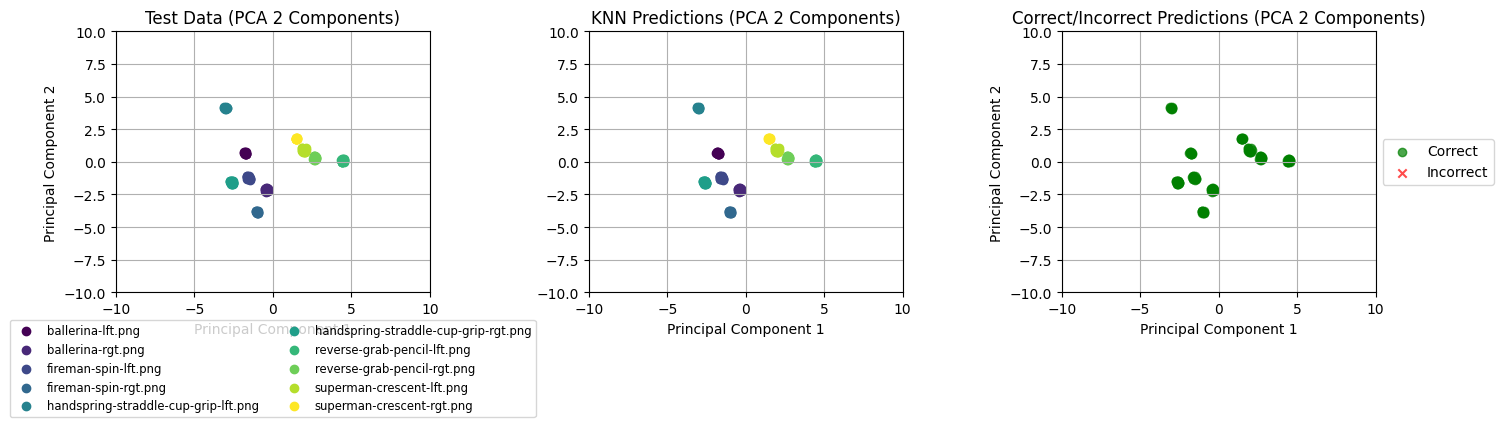

10


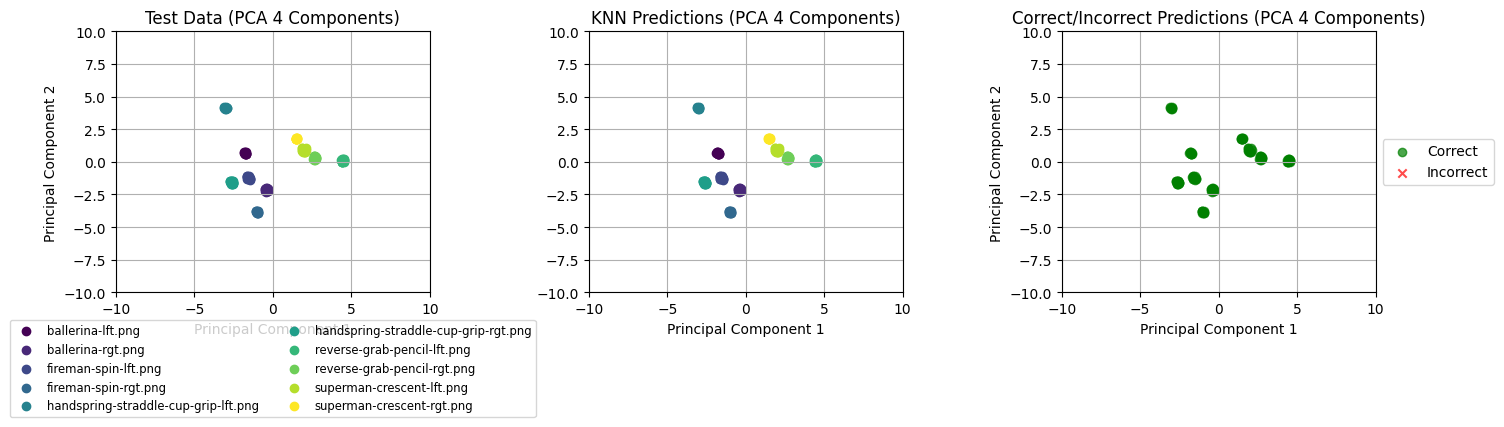

10


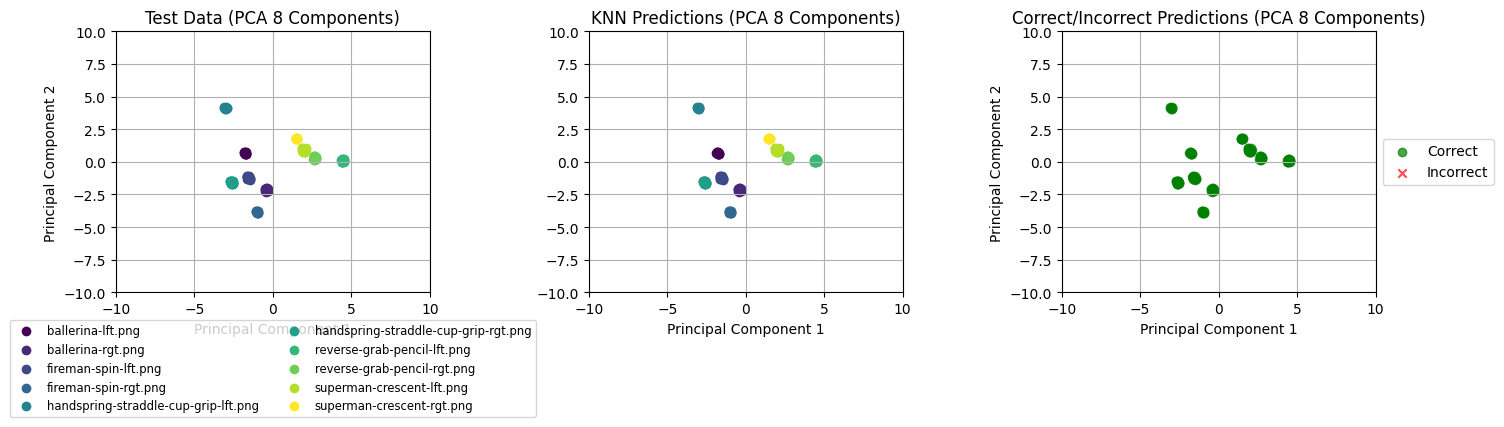

In [21]:
# Randomize 5 Classes

fdata = randomize_pose_classes(aug_data3, size=5)
plot_pca_components(fdata, n_components=2)
plot_pca_components(fdata, n_components=4)
plot_pca_components(fdata, n_components=8)

### 4.2.2 Linear Discriminant Analysis

To achieve the objective of discerning the discriminative features among classes, Linear Discriminant Analysis (LDA) is employed. This approach aims to evaluate the sufficiency of features in delineating class separations and to ascertain whether classes with akin features can be clustered together.

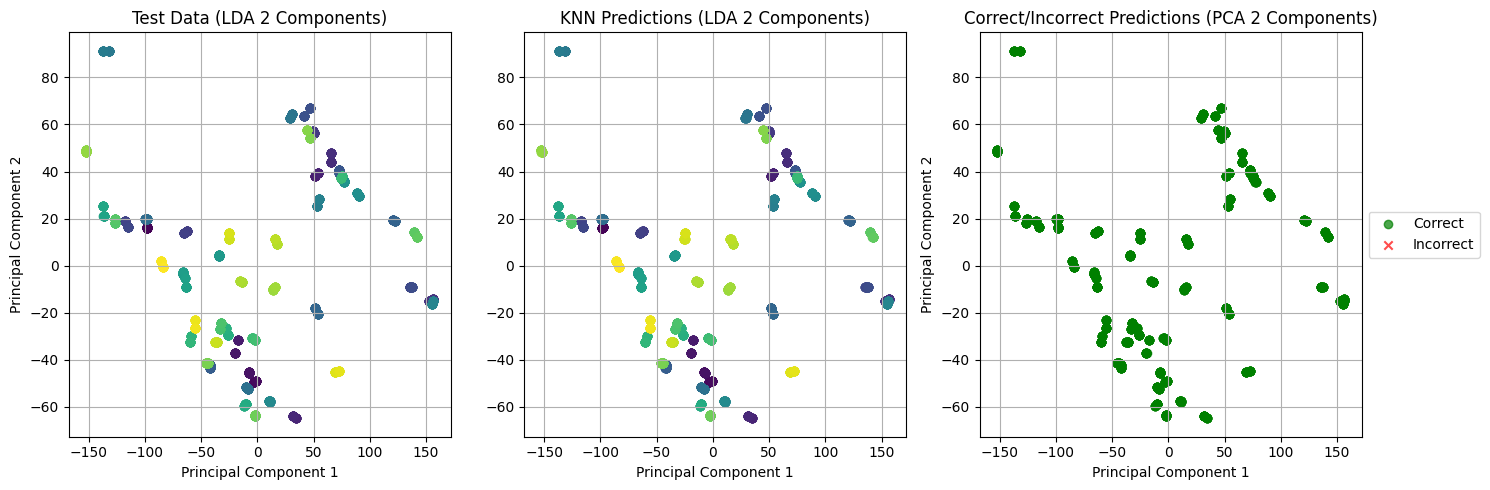

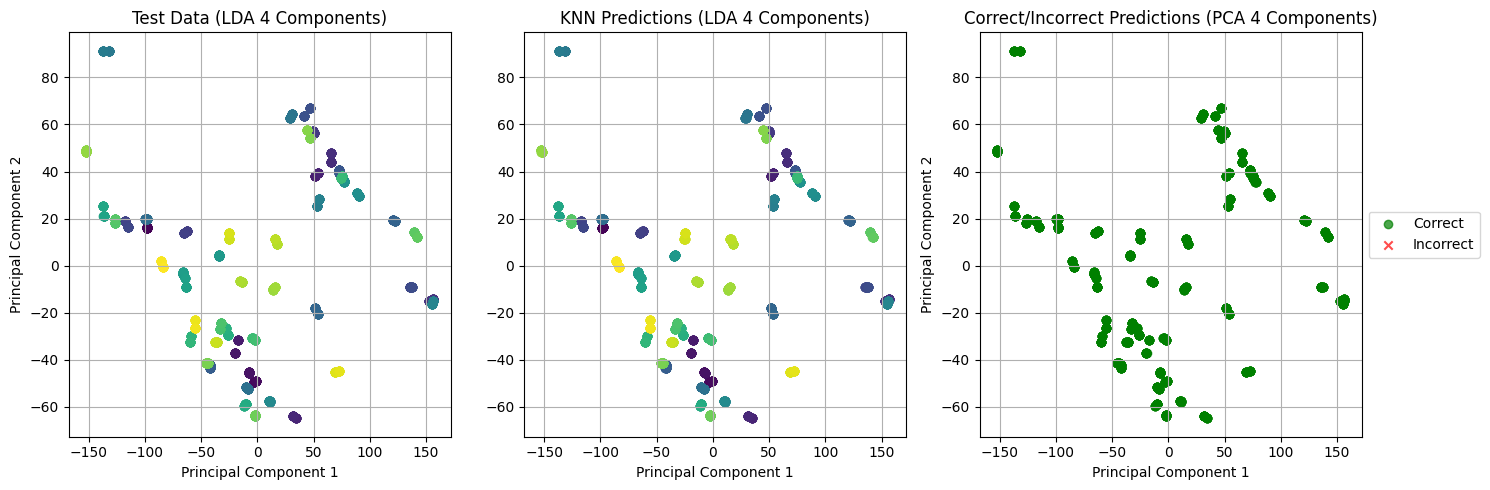

In [33]:
def plot_lda_components(fdata, n_components):
    X = fdata.iloc[:, 104:] 
    y = fdata['label_encoded'].values
    pose_names = fdata['image_filename'].values

    unique_poses = np.unique(pose_names)
    color_values = cm.viridis(np.linspace(0, 1, num=len(unique_poses)))

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test, pose_names_train, pose_names_test = train_test_split(X_scaled, y, pose_names, stratify=y, test_size=0.3, random_state=42)

    lda = LinearDiscriminantAnalysis(n_components=n_components)
    X_train_lda = lda.fit_transform(X_train,y_train)
    X_test_lda = lda.transform(X_test)

    model = KNeighborsClassifier(n_neighbors=15, weights='distance')
    model.fit(X_train_lda, y_train)

    y_pred = model.predict(X_test_lda)

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    for i, pose in enumerate(unique_poses):
        idx = pose_names_test == pose
        axes[0].scatter(X_test_lda[idx, 0], X_test_lda[idx, 1], color=color_values[i], label=pose)
    axes[0].set_title(f'Test Data (LDA {n_components} Components)')
    axes[0].set_xlabel('Principal Component 1')
    axes[0].set_ylabel('Principal Component 2')
    axes[0].grid(True)
    #axes[0].set_xlim([-10, 10])
    #axes[0].set_ylim([-10, 10])

    # Predictions Plot
    for i, pose in enumerate(unique_poses):
        idx = pose_names_test == pose
        axes[1].scatter(X_test_lda[idx, 0], X_test_lda[idx, 1], color=color_values[i], label=pose)
    axes[1].set_title(f'KNN Predictions (LDA {n_components} Components)')
    axes[1].set_xlabel('Principal Component 1')
    axes[1].grid(True)
    #axes[1].set_xlim([-10, 10])
    #axes[1].set_ylim([-10, 10])

    # True Labels Plot
    correct = y_pred == y_test
    incorrect = ~correct
    axes[2].scatter(X_test_lda[correct, 0], X_test_lda[correct, 1], c='green', marker='o', alpha=0.7, label='Correct')
    axes[2].scatter(X_test_lda[incorrect, 0], X_test_lda[incorrect, 1], c='red', marker='x', alpha=0.7, label='Incorrect')
    axes[2].set_title(f'Correct/Incorrect Predictions (PCA {n_components} Components)')
    axes[2].set_xlabel('Principal Component 1')
    axes[2].set_ylabel('Principal Component 2')
    axes[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[2].grid(True)
    #axes[2].set_xlim([-10, 10])
    #axes[2].set_ylim([-10, 10])    
    
    if len(unique_poses) < 6:
        axes[0].legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), fontsize='small', ncol=2)
        
    plt.tight_layout()
    plt.show()

plot_lda_components
fdata = randomize_pose_classes(aug_data3, size=50)
plot_lda_components(fdata, n_components=2)
plot_lda_components(fdata, n_components=4)

### Similar Pose Classes using LDA

Using LDA results, we also identify which poses are easily distinguishable from each other and which poses are similar.

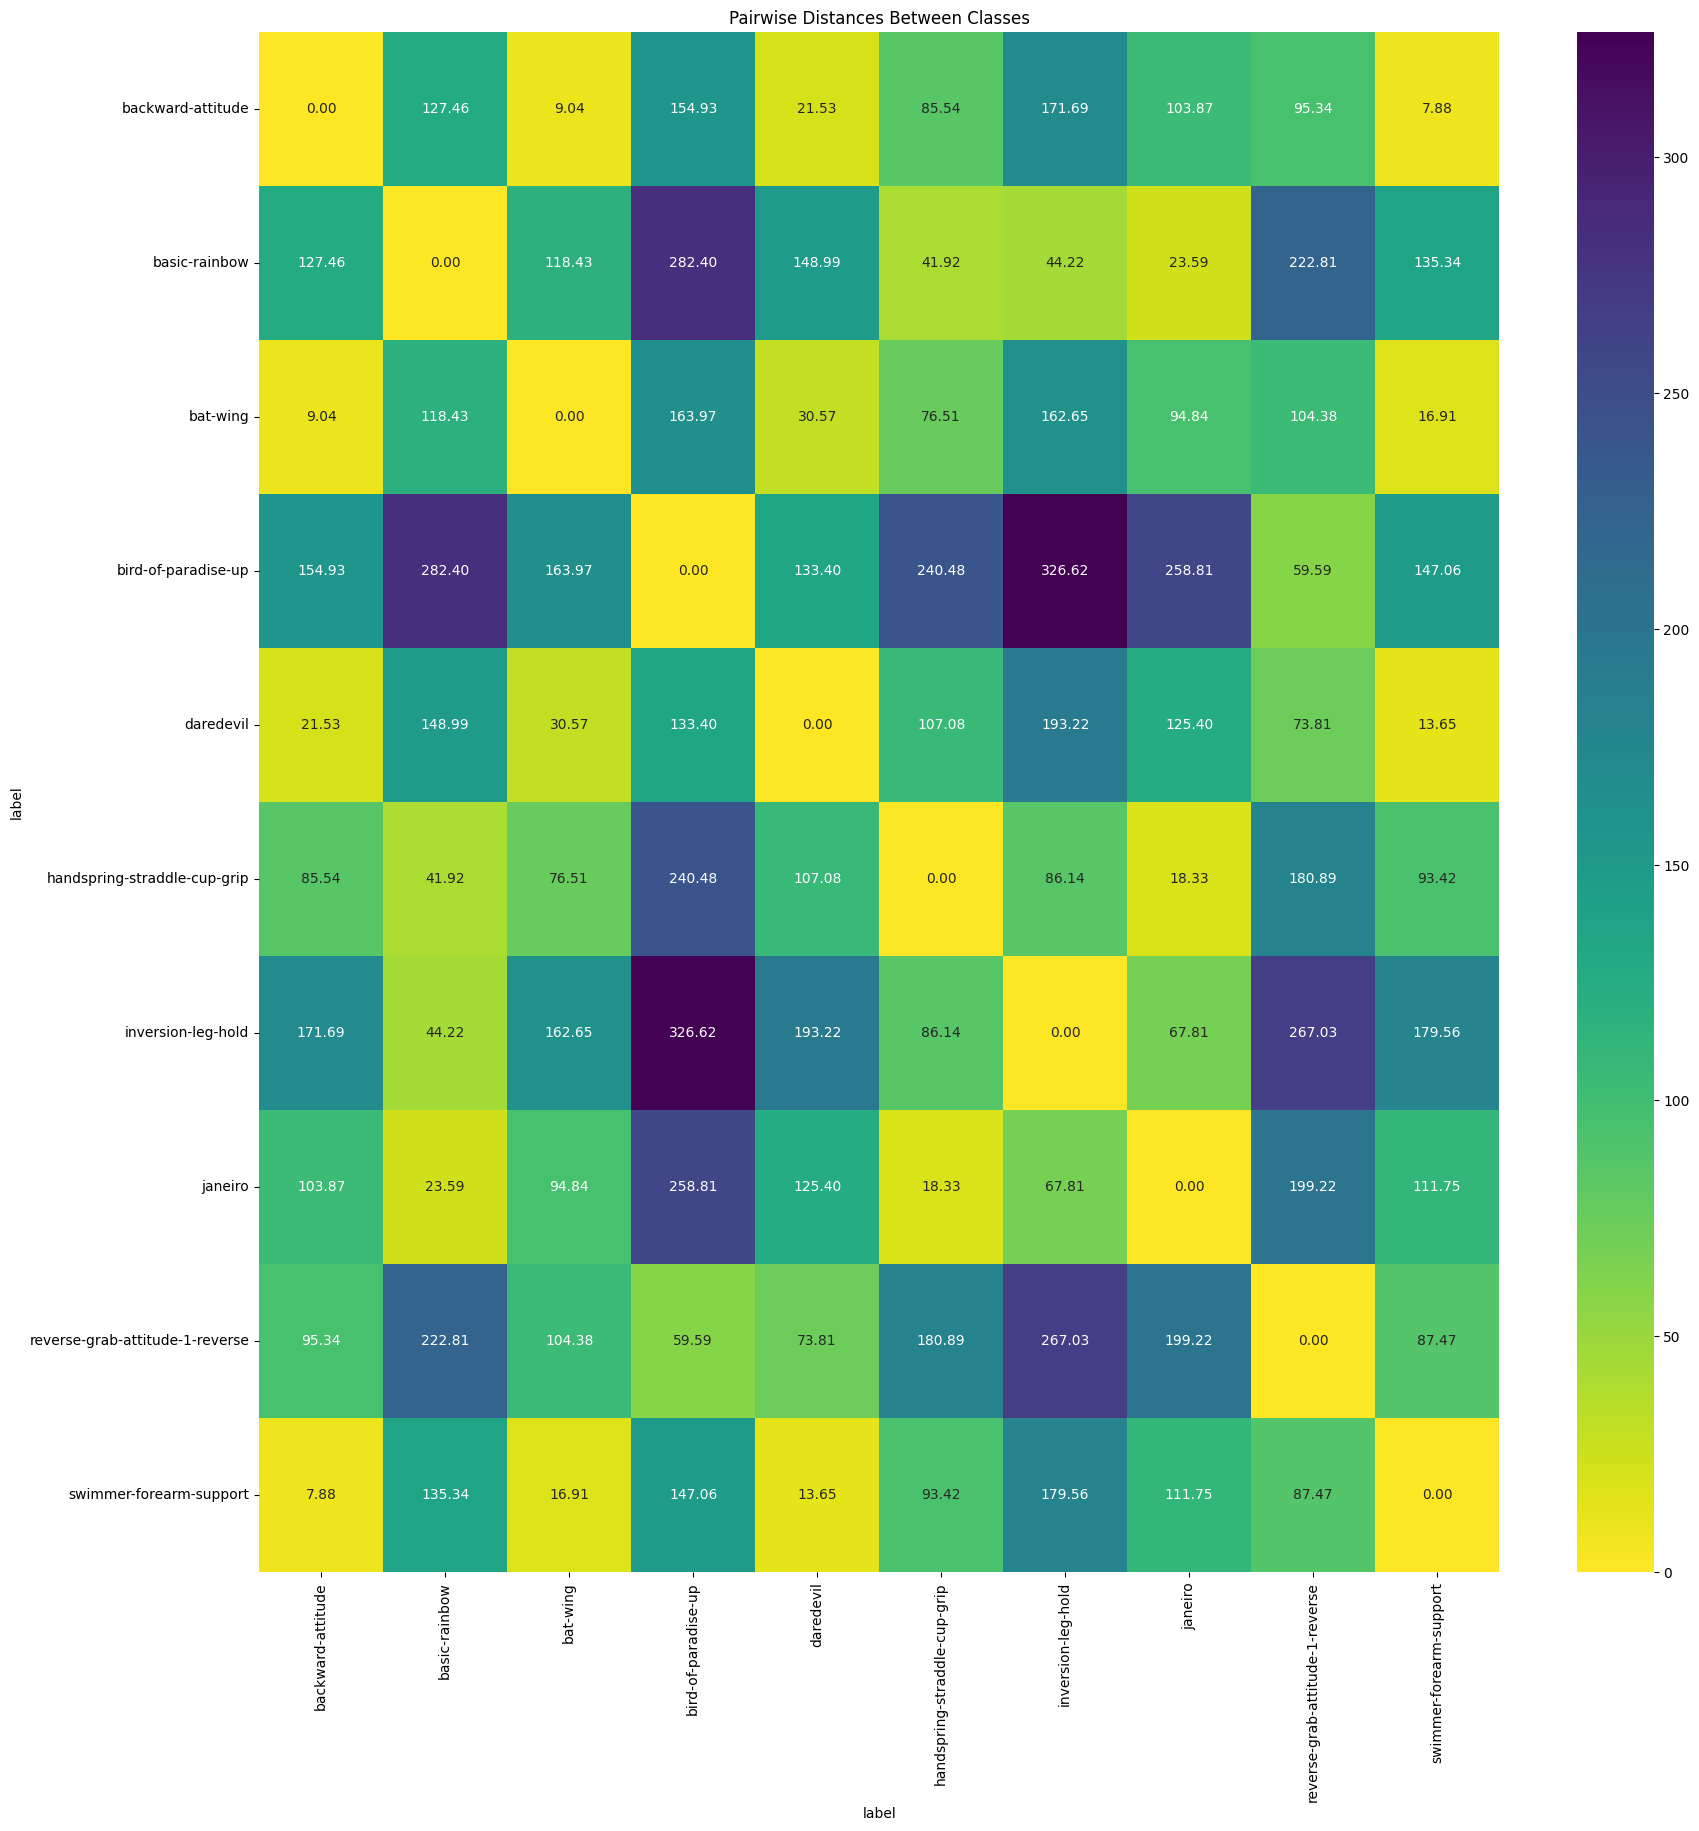

In [296]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial.distance import pdist, squareform
import numpy as np

aug_data3 = pd.read_csv("data/training-set-1/pose_data_augmented_res_z.csv")
aug_data3 = aug_data3.loc[:, ~aug_data3.columns.str.contains('_v')]
aug_data3.iloc[:, 104:]

fdata = randomize_pose_classes(aug_data3, size=10)
Xa4 = fdata.iloc[:, 104:] #only features
ya4 = fdata['label_encoded'].values #labels
y = fdata['label'].values
poses = fdata['label'].unique()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xa4)
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled,ya4)
results = pd.DataFrame(X_lda, columns=['lda'])
results['label'] = y
results = results.groupby('label')['lda'].mean().reset_index()

labels = results['label']
distances = pd.DataFrame(np.zeros((len(labels), len(labels))), columns=labels, index=labels)

for i in range(len(labels)):
    for j in range(len(labels)):
        distances.iloc[i, j] = abs(results.iloc[i]['lda'] - results.iloc[j]['lda'])

plt.figure(figsize=(20, 20))
sns.heatmap(distances, annot=True, fmt=".2f", cmap="viridis_r")
plt.title('Pairwise Distances Between Classes')
plt.show()


## Trial 3 Findings

- Cross-validation yielded higher accuracy with the selection of added features, suggesting that the feature design is effective for classification.
- The importance of dataset cleaning is underscored. To affirm pose closeness, poses must share similar characteristics (e.g., grip, leg position).
- Although class separability is noted among a smaller number of classes, they are still grouped together, indicating the need for additional features.
- For the subsequent trial, it is recommended to apply KNN on test data. This will evaluate the model's ability to generalize to both known and unknown classes effectively.
